In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NODE/max_epochs=500 n_samples=1000 latent_size=3 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_NODE =pathTT + "20240503_Fig1_NBFF_NODE_TT_NODE/gen_model=NODE prefix=20240503_Fig1_NBFF_NODE seed=0 max_epochs=1000 latent_size=3/"
path_LDS = pathTT + "20240503_Fig1_NBFF_LDS_TT_NODE/gen_model=NODE prefix=20240503_Fig1_NBFF_NODE seed=0 max_epochs=1000 latent_size=64/"
path_GRU = pathTT + "20240503_Fig1_NBFF_GRU_TT_NODE/gen_model=NODE prefix=20240503_Fig1_NBFF_NODE seed=0 max_epochs=1000 latent_size=64/"

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTNODE")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

analysis_LDS = Analysis_DT(run_name = "LDS", filepath = path_LDS, model_type = "SAE")
comparison.load_analysis(analysis_LDS, group = "LDS")

analysis_NODE = Analysis_DT(run_name = "NODE", filepath = path_NODE, model_type = "SAE")
comparison.load_analysis(analysis_NODE, group = "NODE")

analysis_GRU = Analysis_DT(run_name = "GRU", filepath = path_GRU, model_type = "SAE")
comparison.load_analysis(analysis_GRU, group = "GRU")

comparison.regroup()

Working on 1 of 4: GRU
Group: GRU
Rate R2: 0.9882385840060861
State R2: 0.7966669646069252
Working on 2 of 4: LDS
Group: LDS
Rate R2: 0.27942811549185054
State R2: 0.27689054259485096
Working on 3 of 4: NODE
Group: NODE
Rate R2: 0.9957051397367662
State R2: 0.9965758335510212
Working on 4 of 4: TT
Group: TT


array([[0.98823858, 0.79666696],
       [0.27942812, 0.27689054],
       [0.99570514, 0.99657583],
       [0.        , 0.        ]])

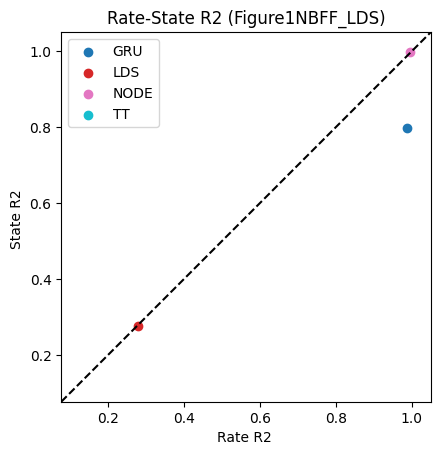

In [4]:
comparison.compare_rate_state_r2(save_pdf=True)

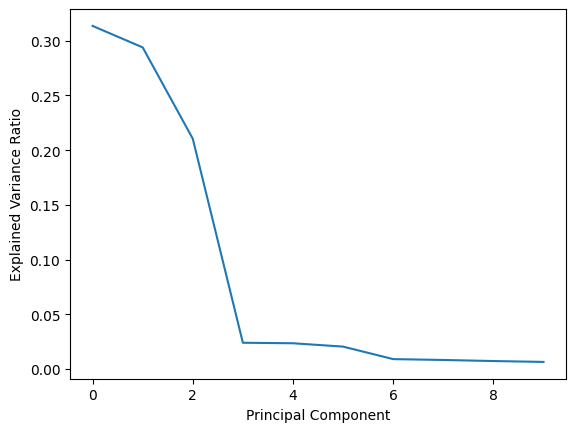

In [5]:
analysis_GRU.plot_scree()

In [6]:
comparison.plot_trials_reference(num_trials =5)

In [ ]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    if latents is not None:
        latents = pca.transform(latents)
        for i in range(100):
            ax.plot(latents[:,0], latents[:,1], latents[:,2], 'k')
    ax.set_title('Model FPS')
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')


In [ ]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    n_inits = 1024,
    learning_rate=6e-4,
    max_iters= 50000,
    
)

In [ ]:
plot_model_fps(tt_fps, q_thresh = 1e-7)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)